# Laporan praktikum 4

## EKSTRASI FITUR

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.feature import graycomatrix, graycoprops

Text(0.5, 1.0, 'HSV')

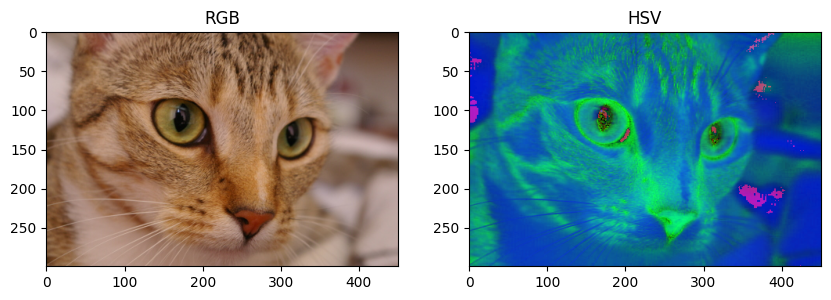

In [27]:
img = skimage.data.chelsea()
img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

fig, axs = plt.subplots(1, 2, figsize = (10, 10))

ax = axs.ravel()

ax[0].imshow(img)
ax[0].set_title('RGB')
ax[1].imshow(img_HSV, cmap = 'gray')
ax[1].set_title('HSV')

In [28]:
# Ambil channel H (Hue) dari gambar HSV
img_hue = img_HSV[2,:,:]

In [29]:
# Ambil channel S (Saturation) dari gambar HSV
img_saturation = img_HSV[:,2,:]

In [30]:
# Ambil channel V (Value) dari gambar HSV
img_value = img_HSV[:,:,2] #manipulasi dimensi

In [ ]:
# Mencari rata rata pada matrik gambar, mencari ciri ciri pada suatu gambar
# #mencari standar deviasi
# gunanya misal g dapat nilai ambang batas,
# pake mean std ini. numpy untuk pemrosesan array dan matriks.

In [31]:
mean = np.mean(img_hue.ravel())
std = np.std(img_hue.ravel())
print(mean, std)

85.80561714708057 61.39021277187163


In [32]:
mean = np.mean(img_saturation.ravel())
std = np.std(img_saturation.ravel())
print(mean, std)

91.33333333333333 69.84877315394388


In [33]:
mean = np.mean(img_value.ravel())
std = np.std(img_value.ravel())
print(mean, std)

147.68165558019217 32.22872299482157


In [ ]:
# grey level co-occurence matrix, metode untuk dapetin yg kode dibawah/ ketidaksamaan korelasi, homogenitas, kontras.
# mengamati perulangan pola, distribusi parsial dan susunan warna
# cara kerja cek piksel ketetanggan berdasarkan sudut
# symetric = true berarti ururtan nilai pada pasangan piksel tidak dipertimbangakan
# normed = untuk normalisasi hasilnya agar lebih mudah di ekstrasi fiturnya, kalo true berarti tidak di normalisasi

In [34]:
glmcHue = graycomatrix(img_hue, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
print(glmcHue)

[[[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 ...


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]]


In [35]:
glmcSaturation = graycomatrix(img_saturation, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
print(glmcSaturation)

[[[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 ...


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]]


In [36]:
glmcValue = graycomatrix(img_value, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
print(glmcValue)

[[[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 ...


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]


 [[[0.]]

  [[0.]]

  [[0.]]

  ...

  [[0.]]

  [[0.]]

  [[0.]]]]


In [37]:
contrastHue = graycoprops(glmcHue, 'contrast')[0,0]
dissimilarityHue = graycoprops(glmcHue, 'dissimilarity')[0,0]
homogeneityHue = graycoprops(glmcHue, 'homogeneity')[0,0]
energyHue = graycoprops(glmcHue, 'energy')[0,0]
correlationHue = graycoprops(glmcHue, 'correlation')[0,0]

In [38]:
contrastSaturation = graycoprops(glmcSaturation, 'contrast')[0,0]
dissimilaritySaturation = graycoprops(glmcSaturation, 'dissimilarity')[0,0]
homogeneitySaturation = graycoprops(glmcSaturation, 'homogeneity')[0,0]
energySaturation = graycoprops(glmcSaturation, 'energy')[0,0]
correlationSaturation = graycoprops(glmcSaturation, 'correlation')[0,0]

In [39]:
contrastValue = graycoprops(glmcValue, 'contrast')[0,0]
dissimilarityValue = graycoprops(glmcValue, 'dissimilarity')[0,0]
homogeneityValue = graycoprops(glmcValue, 'homogeneity')[0,0]
energyValue = graycoprops(glmcValue, 'energy')[0,0]
correlationValue = graycoprops(glmcValue, 'correlation')[0,0]

In [40]:
# HUE
print (f'contrast : {contrastHue}')
print (f'dissimilarity : {dissimilarityHue}')
print (f'homogeneity : {homogeneityHue}')
print (f'energy : {energyHue}')
print (f'correlation : {correlationHue}')

contrast : 8061.4246119733925
dissimilarity : 81.20288248337029
homogeneity : 0.004550686916505503
energy : 0.03155265958039403
correlation : -0.2585071119799076


In [41]:
# SATURATION
print (f'contrast : {contrastSaturation}')
print (f'dissimilarity : {dissimilaritySaturation}')
print (f'homogeneity : {homogeneitySaturation}')
print (f'energy : {energySaturation}')
print (f'correlation : {correlationSaturation}')

contrast : 12344.258333333335
dissimilarity : 94.44166666666668
homogeneity : 0.007472238609512984
energy : 0.05348935511960405
correlation : -0.38134254068092477


In [42]:
# VALUE
print (f'contrast : {contrastValue}')
print (f'dissimilarity : {dissimilarityValue}')
print (f'homogeneity : {homogeneityValue}')
print (f'energy : {energyValue}')
print (f'correlation : {correlationValue}')

contrast : 82.3433777777778
dissimilarity : 5.46682962962963
homogeneity : 0.2752595577642788
energy : 0.024678560140126676
correlation : 0.9603171366645207
